# Recognizing hand-written digits With ANN.

- This notebook we try to classify the MNIST dataset using Artificial Neural Network which we learn in section.
- we use mnist dataset in keras framework.
- we apply ANN consists of 3 dense layer each followed by dropout layer to reduce over fitting. 

- This done by:<br>

  1- Mohamed Badr Ismail.<br>

  2- Karim Ashoor Mohamed.  

In [6]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
# convert label to one hot encoder 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [10]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [11]:
# network parameters
batch_size = 128
hidden_units = 256  
dropout = 0.45        # for reducing over fitting

In [12]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

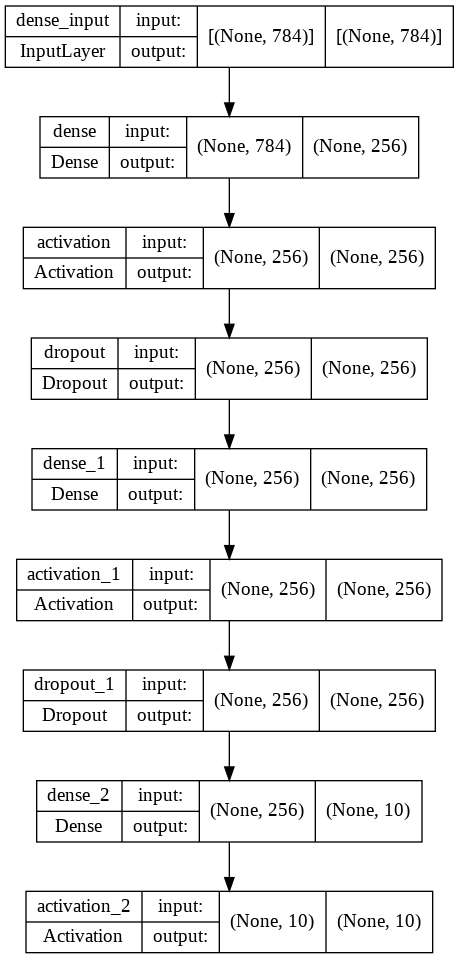

In [14]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4228 - accuracy: 0.8698
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1916 - accuracy: 0.9425
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1507 - accuracy: 0.9548
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1320 - accuracy: 0.9600
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1123 - accuracy: 0.9660
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1032 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0919 - accuracy: 0.9714
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0857 - accuracy: 0.9726
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0826 - accuracy: 0.9743
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0768 - accuracy: 0.9762

In [17]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9828

Test accuracy: 98.3%
